# Цель проекта:

Совместно с отделом маркетинга провести исследования, которые позволят увеличить выручку интернет-магазина.

# Описание проекта:

Сделать приоритизацию гипотез, которые были подготовлены отделом маркетинга, при помощи двух фреймворков: ICE и RICE. Проанализировать результаты A/B теста для оценки предполагаемого эффекта от внедрения планируемых изменений. Написать выводы.


## Приоритизация гипотез.

### Оценка исходных данных:

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
import scipy.stats as stats

In [2]:
# загружаем данные и сохраняем в переменную:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# Используем метод info чтобы изучить исходную информацию:
hypothesis.info()
print('Количество дубликатов:', hypothesis.duplicated().sum())
pd.options.display.max_colwidth = 110 # изменения количества отображаемых символов
display(hypothesis.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
Количество дубликатов: 0


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


#### Вывод:

Исходные данные с информацией об анализируемых гипотезах в полном порядке: нет дубликатов, отсутствуют пропуски и данные имеют правильный формат.

### Фреймворк ICE (impact, confidence, effort/ease):

Фреймворк ICE - один из популярных методов приоритизации задач и имеет довольно простые формулы для расчёта. 
1. ICE = impact * confidence * ease
или
2. ICE = impact * confidence / effort

Для расчёта ICE будем использовать вторую формулу, так как в наших данных есть информация по усилиям - efforts.
Расчитаем ICE для каждой гипотезы и сохраним результат в отдельном столбце:

In [4]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [5]:
# Отсортируем гипотезы по фреймворку ICE в порядке убывания:
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


#### Вывод:

По фреймворку ICE лидерство за такими гипотезами как:
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Фреймворк RICE (reach, impact, confidence, effort):

Фреймворк RICE (отличается от ICE тем, что учитывает скольких пользователей затронет изменение): 
RICE = reach * impact * confidence / effort

Расчитаем RICE для каждой гипотезы и сохраним результат в отдельном столбце:

In [6]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [7]:
# Отсортируем гипотезы по фреймворку RICE в порядке убывания:
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Вывод:

По фреймворку RICE лидерство за такими гипотезами как:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

### Вывод:

Если взглянуть на оба фреймворка ICE и RICE, которые мы применили для приоритизации гипотез, то можно выделить 4 явные гипотезы, которые имеют наименьшее значение для нашего бизнеса:
1. Запустить собственную службу доставки, что сократит срок доставки заказов
2. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
3. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
4. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов

При этом тройка лидеров среди гипотез в этих двух фреймворках различна.
Для ICE лидерами стали следующие гипотезы:
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

А для RICE лидерство в гипотезах за:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Различие в полученных результатах обсуловленно тем, что во фреймворке RICE есть дополнительный множитель reach - коэффициент, который учитывает скольких пользователей затронет изменение.

По итогам приоритезации гипотез, в первую очередь необходимо сосредоточиться на этих двух гипотезах:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Так как эти две гпиотезы попали в топ 3 при приоритезации с использованием фреймворков ICE и RICE.

## Анализ A/B-теста.

### Изучим данные по A/B тесту:

In [8]:
# Загрузим результаты A/B теста и сохраним в переменные:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
# Используем метод info чтобы изучить информацию о заказах во время A/B теста:
orders.info()
print('Количество дубликатов:', orders.duplicated().sum())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
Количество дубликатов: 0


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
# Используем метод info чтобы изучить информацию о посещениях во время A/B теста:
visitors.info()
print('Количество дубликатов:', visitors.duplicated().sum())
display(visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Количество дубликатов: 0


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
# Сгруппируем таблицу orders по уникальным посетителям и
# найдем сколько раз каждый пользователь встречается в каждой группе:
unique_users_in_orders = orders.groupby('visitorId')['group'].nunique().reset_index()

In [12]:
# Сделаем срез из группированной таблицы, чтобы получить количетсво пользователей, которые попали в обе группы:
non_unique_users_in_orders = unique_users_in_orders.query('group > 1')
display(non_unique_users_in_orders.head())
print('Количетсво пользователей, которые попали в обе группы:', len(non_unique_users_in_orders))

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


Количетсво пользователей, которые попали в обе группы: 58


#### Вывод:

В данных по A/B тесту отсутствуют дубликаты и пропуски. Но неправильный формат для столбца с датой в обоих таблицах. Так же следует переименовать столбцы transactionId и visitorId	из таблицы orders в transaction_id и visitor_id соответственно. Кроме того, 58 пользователей попали в обе группы, а это может исказить иследования. Необходимо удалить этих пользователей из таблицы orders.

### Подготовка данных:

In [13]:
# Список не уникальных пользователей, т.е. тех, кто попал в обе группы A/B теста: 
list_of_non_unique_users = non_unique_users_in_orders['visitorId'].tolist()

In [14]:
# Удаляем из таблицы orders пользователей, которые попали в обе группы:
orders = orders[~orders['visitorId'].isin(list_of_non_unique_users)].reset_index(drop=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null object
revenue          1016 non-null int64
group            1016 non-null object
dtypes: int64(3), object(2)
memory usage: 39.8+ KB


In [15]:
# Переимунеум 2 столбца из таблицы orders:
orders = orders.rename(columns = {
    'transactionId': 'transaction_id',
    'visitorId': 'visitor_id'
})
# Проверим, переименовались столбцы или нет:
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [16]:
# Поменяем формат во всех столбцах с датой:
orders['date'] = pd.to_datetime(orders['date'], format='%Y.%m.%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y.%m.%d')

In [17]:
# Проверим, изменился ли тип данных для столбца date:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
transaction_id    1016 non-null int64
visitor_id        1016 non-null int64
date              1016 non-null datetime64[ns]
revenue           1016 non-null int64
group             1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 39.8+ KB


In [18]:
# Проверим, изменился ли тип данных для столбца date:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#### Вывод:

Данные готовы к дальнейшнему исследованию: столбцы переименованные и все даты приведены к соответствующему формату.

### Анализ A/B теста

In [19]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [20]:
# Агрегируем значения. Вычислим максимальную дату. 
# Для группы тоже рассчитаем максимум(чтобы столбец 'group' не пропал из итогового вывода). 
# Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму чеков, применяя метожды к каждой строке
# датафрейма apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group':
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
# Агрегируем значения. Вычислим максимальную дату. 
# Для группы тоже рассчитаем максимум(чтобы столбец 'group' не пропал из итогового вывода). 
# Подсчитаем сумму посетителей, применяя метожды к каждой строке
# датафрейма apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group':
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [22]:
# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


#### График кумулятивной выручки по группам:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


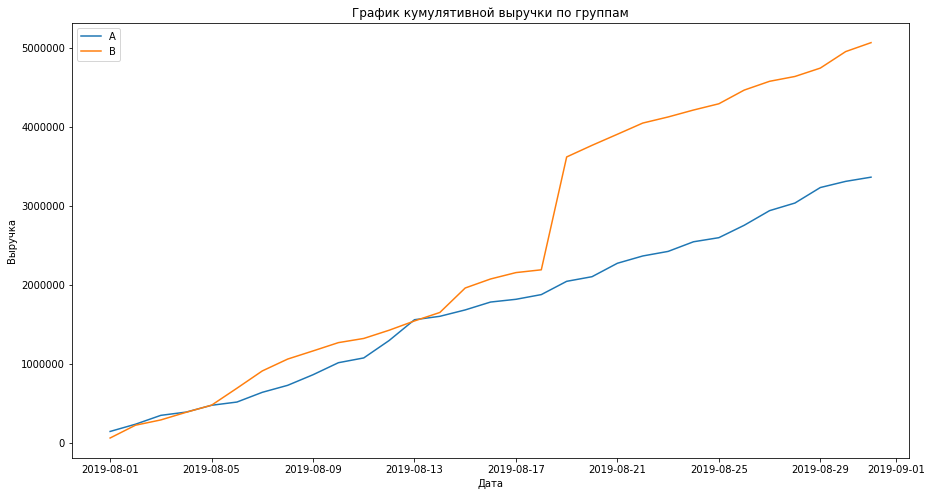

In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Оформим график до конца: увеличим размер, добавим подписи осей и легенду:
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.ylabel('Выручка')
plt.xlabel('Дата')
fig = plt.gcf()
fig.set_size_inches(15, 8)

##### Выводы и предположения:

Кумулятивная выручка группы А равномерно увеличивается в течение всего теста. Кумулятивная выручка группы B так же увеличивается в течение всего теста, но в середине месяца наблюдается резкий скачок кумулятивной выручки. Это может сигнализировать о всплеске числа заказов, либо о появлении дорогих заказов.

#### График кумулятивного среднего чека по группам:

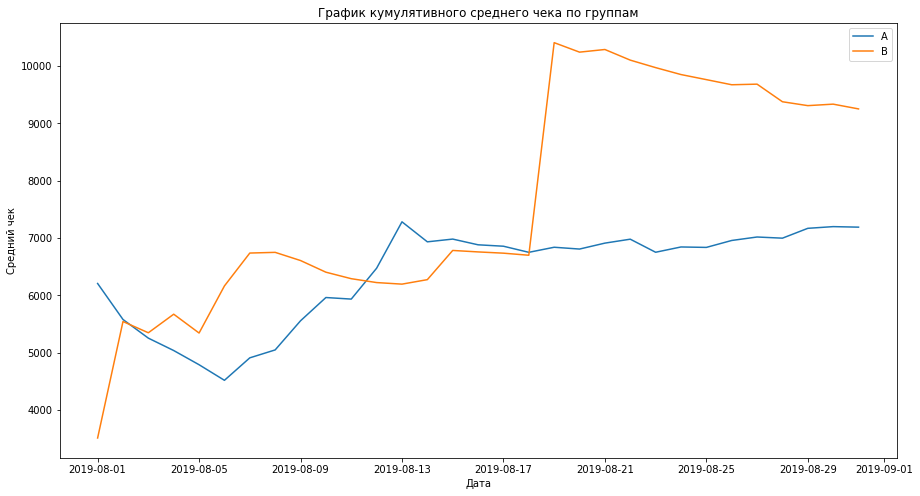

In [24]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

# Оформим график до конца: увеличим размер, добавим подписи осей и легенду:
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.ylabel('Средний чек')
plt.xlabel('Дата')
fig = plt.gcf()
fig.set_size_inches(15, 8)

##### Выводы и предположения:

Средний чек для группы А показывал снижение в первые дни месяцы, однако затем перешел к росту и во второй половине месяца стабилизировался. Средний чек из группы B показывал равномерный рост до середины месяца, далее на графике наблюдается резкий всплеск (скорее всего сказывается появление крпных заказов) и после этого график среднего чека показывает равномерное снижение. Группе B необходимо больше данных чтобы средний чек пришел к реальному значению и установился на его уровне.

#### График относительного изменения кумулятивного среднего чека группы B к группе A:

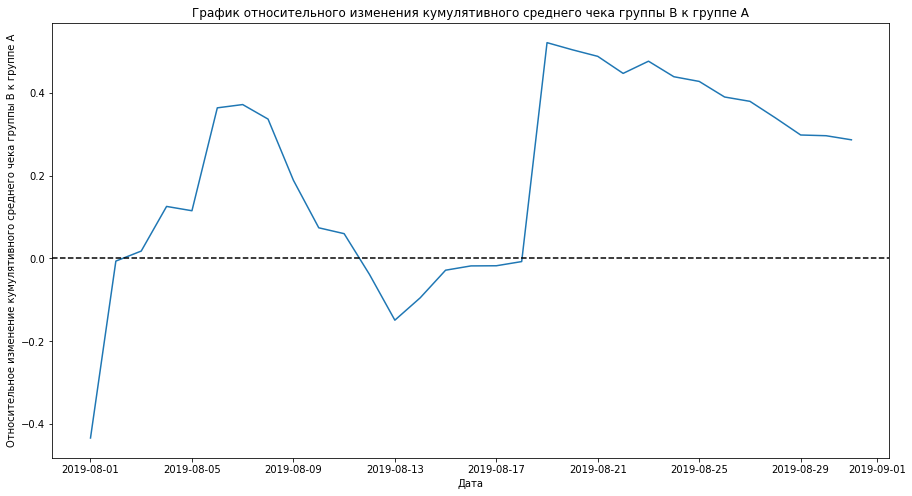

In [25]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

# Оформим график до конца: увеличим размер, добавим подписи осей:
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
fig = plt.gcf()
fig.set_size_inches(15, 8)

##### Выводы и предположения:

График относительного изменения кумулятивного среднего чека группы B к группе A получился с довольно резкими скачками и невозможно определить равновесное соотношение кумулятивного среднего чека группы B к группе A. Сказывается влияние аномальных по сумме заказов.

#### График кумулятивной конверсии по группам:

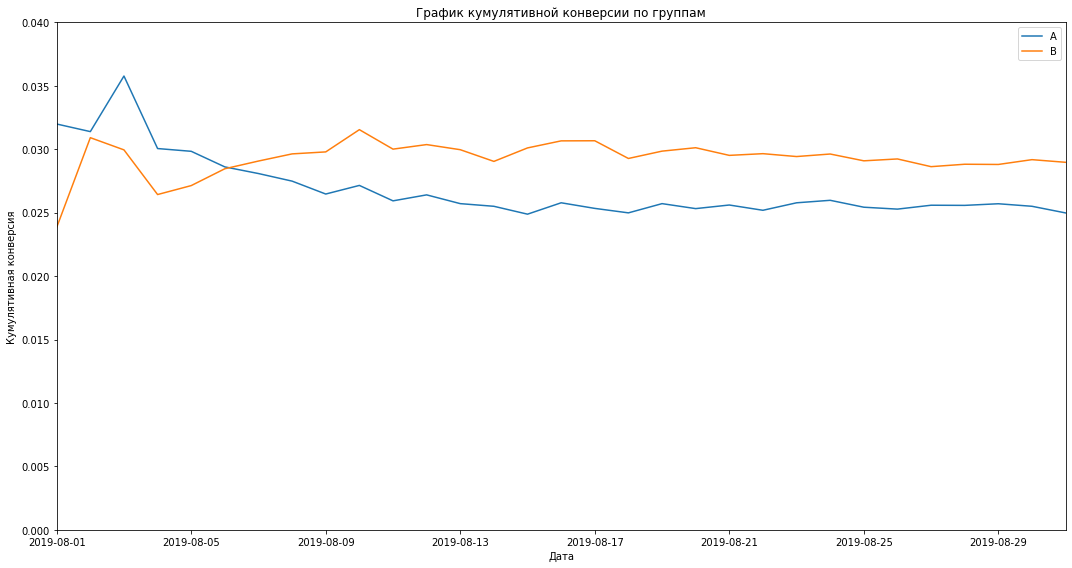

In [26]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

# Оформим график до конца: увеличим размер, добавим подписи осей:
plt.title('График кумулятивной конверсии по группам')
plt.legend()
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
fig = plt.gcf()
fig.set_size_inches(15, 8)

# задаем масштаб осей
plt.axis([cumulativeData['date'].min(), cumulativeData['date'].max(), 0, 0.04])
plt.tight_layout()

##### Выводы и предположения:

Конверсия группы B, начиная со 2ой недели, вырвалась вперед и к концу теста установилась на уровне 3.0%. В то же время конверсия группы А показала снижение по итогам первой недели и зафиксировалась на уровне 2.5%.

#### График относительного изменения кумулятивной конверсии группы B к группе A:

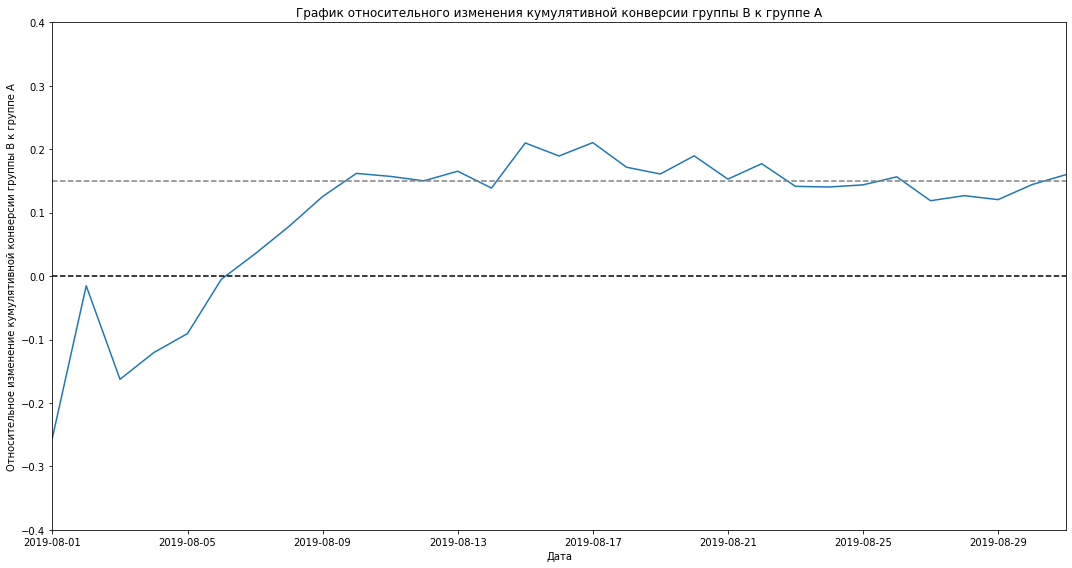

In [27]:
# Объединим в единый датафрем таблицы cumulativeDataA и cumulativeDataB:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Строим график:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

# Построим горизонтальные линии на графике, где 0 линия означает, что конверисии групп A и B равны.
# А вторая линия, предположение, что конверия группы B выше конверсии группы A приблизительно на 15% (исходя
# из предыдущего графика, по которому конверися группы B составила 3%, а группы A - 2.5%)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

# задаем масштаб осей
plt.axis([cumulativeData['date'].min(), cumulativeData['date'].max(), -0.4, 0.4])

# Оформим график до конца: увеличим размер, добавим подписи осей:
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.ylabel('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.tight_layout()

##### Выводы и предположения:

Конверсия группы B лучше конверсии группы А где-то на 15% в конце теста, не смотря на то, что на первой неделе конверсия у группы А была незначительно выше.

#### Точечный график количества заказов по пользователям:

In [28]:
# Сгруппируем таблицу с заказами по пользователям и посчитаем количетсво заказов на каждого пользователя:
orders_by_visitor = orders.groupby('visitor_id')['revenue'].count().reset_index()

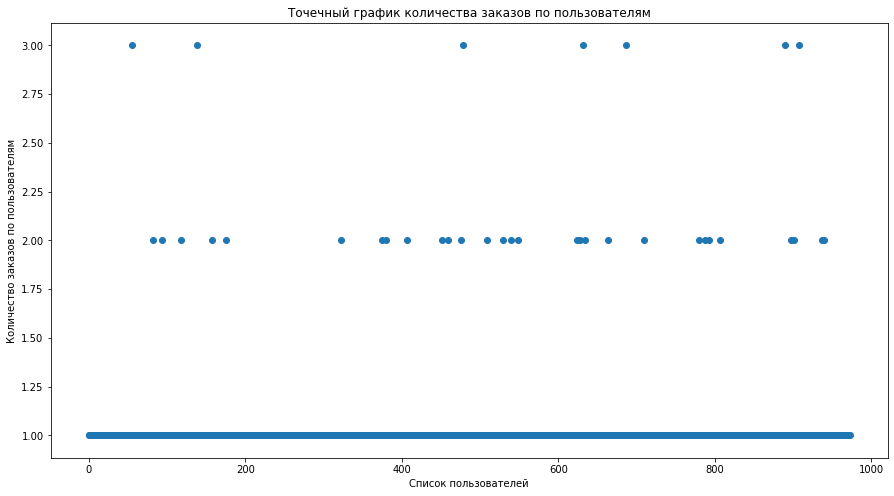

In [29]:
# Точечный график количества заказов по пользователям:
x_values = pd.Series(range(0,len(orders_by_visitor)))
plt.scatter(x_values, orders_by_visitor['revenue'])

# Оформим график до конца: увеличим размер, добавим подписи осей:
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов по пользователям')
plt.xlabel('Список пользователей')
fig = plt.gcf()
fig.set_size_inches(15, 8)



##### Выводы и предположения:

Среди пользователей не так много тех, кто делает 3 и более заказа. Большинство пользователей совершает 1 заказ.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [30]:
# Для подсчёта перцентилей применbv метод percentile() библиотеки Numpy:
percentile_for_orders = np.percentile(orders_by_visitor['revenue'], [95, 99])
print('Не более 5% пользователей делают более', int(percentile_for_orders[0]), 'заказа/-ов')
print('Не более 1% пользователей делают более', int(percentile_for_orders[1]), 'заказа/-ов')

Не более 5% пользователей делают более 1 заказа/-ов
Не более 1% пользователей делают более 2 заказа/-ов


In [31]:
# Сохраним в переменную qty_limit границу определения аномальных пользователей:
qty_limit = 2

##### Выводы и предположения:

В качестве границы аномальных пользователей выберем всех, кто совершил 3 и более заказов. Т.е. в итоговую выборку будет входить пользователи, которые совершили 1 или 2 заказа.

#### Точечный график стоимостей заказов:

In [32]:
# Сгруппируем таблицу с заказами по транзакциям и посчитаем сумму заказов в каждой транзакции:
orders_by_transaction = orders.groupby('transaction_id')['revenue'].sum().reset_index()

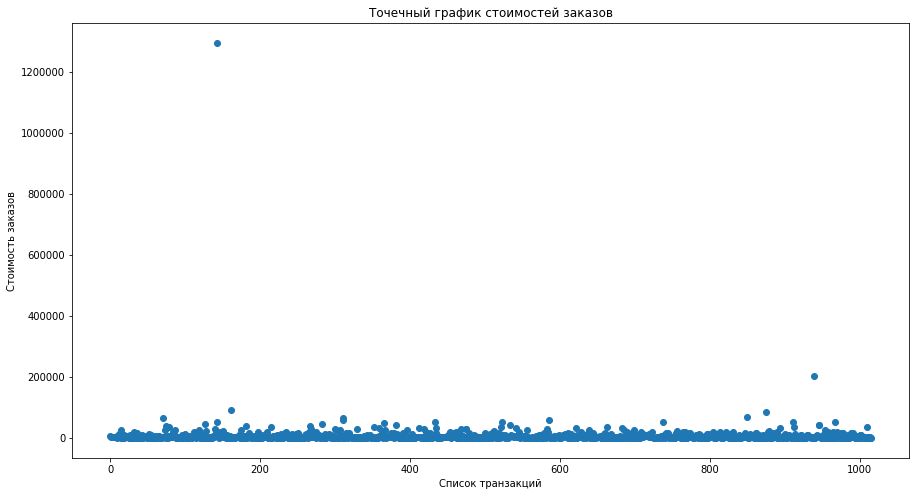

In [33]:
# Точечный график стоимости заказов:
x_values = pd.Series(range(0,len(orders_by_transaction)))
plt.scatter(x_values, orders_by_transaction['revenue'])

# Оформим график до конца: увеличим размер, добавим подписи осей:
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Список транзакций')
fig = plt.gcf()
fig.set_size_inches(15, 8)

График получился не очень информативным из-за наличия нескольких аномально высоких по сумме заказов (один около 1200000, а второй чуть больше, чем 200000), когда основная масса заказов лежит в пределах 100000. Посмотрим на тот же график, но в масштабе до 100000 по стоимость заказа:

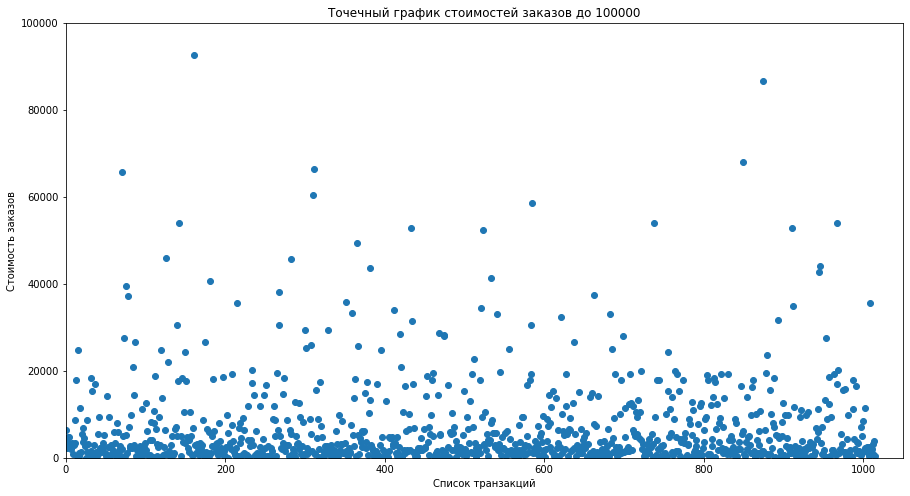

In [34]:
# Точечный график стоимости заказов:
x_values = pd.Series(range(0,len(orders_by_transaction)))
plt.scatter(x_values, orders_by_transaction['revenue'])
plt.axis([0, 1050, 0, 100000])

# Оформим график до конца: увеличим размер, добавим подписи осей:
plt.title('Точечный график стоимостей заказов до 100000')
plt.ylabel('Стоимость заказов')
plt.xlabel('Список транзакций')
fig = plt.gcf()
fig.set_size_inches(15, 8)

##### Выводы и предположения:

Очень мало заказов, стоимость которых превышает 60000. При этом есть один заказ, стоимость которого превышает 1200000. Скорее всего, это тот самый заказ из группы B, который сильно влиял на размер среднего чека.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [35]:
# Для подсчёта перцентилей применbv метод percentile() библиотеки Numpy:
percentile_for_transaction = np.percentile(orders_by_transaction['revenue'], [95, 99])
print('Стоимость не более 5% заказов составляет от', int(percentile_for_transaction[0]))
print('Стоимость не более 1% заказов составляет от', int(percentile_for_transaction[1]))

Стоимость не более 5% заказов составляет от 26785
Стоимость не более 1% заказов составляет от 53904


In [36]:
# Сохраним в переменную revenue_limit границу определения аномальных пользователей:
revenue_limit = 50000

##### Выводы и предположения:

В качестве границы аномальных заказов возьмём стоимость заказов, равную 50000. То есть, все заказы до 50000 будут входить в итоговую выборку.

#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным:

In [37]:
# Срез из посетителей из группы А:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Кумулятивное значение посетителей из группы А:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [38]:
# Срез из посетителей из группы В:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Кумулятивное значение посетителей из группы B:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [39]:
# Срез по заказам из группы А, сгруппированный по дням и подсчёт количества заказов и выручка с них:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Расчёт кумулятивных показателей количества заказов и выручки с них по заказам из группы А:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [40]:
# Срез по заказам из группы B, сгруппированный по дням и подсчёт количества заказов и выручка с них:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Расчёт кумулятивных показателей количества заказов и выручки с них по заказам из группы B:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [41]:
# Объединми созданные ранее таблицы в одну:
data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head()) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [42]:
# Сохраним в переменую ordersByUsersA пользователей из группы А, которые хотя бы раз совершали заказ,
# и посчитаем сколько заказов было сделано каждым пользователем:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# Сохраним в переменую ordersByUsersB пользователей из группы B, которые хотя бы раз совершали заказ,
# и посчитаем сколько заказов было сделано каждым пользователем:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [43]:
# Объявим переменные sampleA в которой пользователям из группы А будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

sampleA = pd.concat( # объединяем последовательности функцией pd.concat()
    [
        ordersByUsersA['orders'], # Список с количеством заказов для каждого из пользователей
        pd.Series(
            0, # Нули для пользователей, которые ничего не заказывали.
            index=np.arange( # Список индексов создали функцией np.arange(), которая создаёт массив индексов в формате np.array, который требуется в pd.Series.
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']) # Количество 0 для пользователей равно разнице между суммой посетителей и количеством записей о заказах.
            ),
            name='orders',
        ),
    ],
    axis=0, # аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд).
)

In [44]:
# Объявим переменные sampleB в которой пользователям из группы B будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

sampleB = pd.concat( # объединяем последовательности функцией pd.concat()
    [
        ordersByUsersB['orders'], # Список с количеством заказов для каждого из пользователей
        pd.Series(
            0, # Нули для пользователей, которые ничего не заказывали.
            index=np.arange( # Список индексов создали функцией np.arange(), которая создаёт массив индексов в формате np.array, который требуется в pd.Series.
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']) # Количество 0 для пользователей равно разнице между суммой посетителей и количеством записей о заказах.
            ),
            name='orders',
        ),
    ],
    axis=0, # аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд).
)

Перед применением U-критерий Манна-Уитни сформулируем нулевую(H0) и альтернативную(H1) гипотезы:

1. Нулевая гипотеза H0: Статистически значимых различий в конверсии между группами B и A нет и они равны. 
2. Альтернативная гипотеза H1: Есть статистически значимые различия в конверсии между группами B и A.

In [45]:
# Применим критерий mannwhitneyu() и отформатируем p-value, округлив его до трёх знаков после запятой:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке
# sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
# Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.
print('Относительный выигрыш(>0)/проигрыш(<0) группы B равен = {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.006
Относительный выигрыш(>0)/проигрыш(<0) группы B равен = 0.160


##### Выводы и предположения:

По «сырым» данным есть различия в конверсии групп A и B.
p-value = 0.006 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 16%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:

Перед применением U-критерий Манна-Уитни сформулируем нулевую(H0) и альтернативную(H1) гипотезы:

1. Нулевая гипотеза H0: Статистически значимых различий в среднем чеке групп B и A нет и они равны. 
2. Альтернативная гипотеза H1: Есть статистически значимые различия в среднем чеке групп B и A.

In [46]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами,
# передадим критерию mannwhitneyu() данные о выручке с заказов:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# Найдём относительные различия в среднем чеке между группами, где для подсчёта среднего чека нам
# достаточно просто из таблицы заказов взять среднее значение по группе:
print('Относительные различия в среднем чеке между группами: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.415
Относительные различия в среднем чеке между группами: 0.287


##### Выводы и предположения:

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно выше среднего чека группы A.

#### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:

In [47]:
# Узнаем, сколько всего аномальных пользователей методом shape():
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > qty_limit]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > qty_limit]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_limit]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())
print('Всего аномальных пользователей:', abnormalUsers.shape)

937    148427295
33     249864742
58     611059232
972    759473111
811    887908475
dtype: int64
Всего аномальных пользователей: (22,)


In [48]:
# Подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers)) # исключаем аномальных пользователей
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers)) # исключаем аномальных пользователей
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Перед применением U-критерий Манна-Уитни сформулируем нулевую(H0) и альтернативную(H1) гипотезы:

1. Нулевая гипотеза H0: Статистически значимых различий в конверсии между отфильтрованными группами B и A нет и они равны. 
2. Альтернативная гипотеза H1: Есть статистически значимые различия в конверсии между отфильтрованными группами B и A.

In [49]:
# Применим статистический критерий Манна-Уитни к полученным выборкам:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1.
# Округлим до трёх знаков после запятой.
print('Относительный выигрыш(>0)/проигрыш(<0) группы B равен = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.003
Относительный выигрыш(>0)/проигрыш(<0) группы B равен = 0.198


##### Выводы и предположения:

По «очищенным» данным так же есть различия в конверсии групп A и B.
p-value = 0.003 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B увеличился по сравнению с "сырыми" данными на 3,8% и теперь равен 19,8% вместо 16%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:

Перед применением U-критерий Манна-Уитни сформулируем нулевую(H0) и альтернативную(H1) гипотезы:

1. Нулевая гипотеза H0: Статистически значимых различий в среднем чеке отфильтрованных групп B и A нет и они равны. 
2. Альтернативная гипотеза H1: Есть статистически значимые различия в среднем чеке отфильтрованных групп B и A.

In [50]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительные различия в среднем чеке между группами: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.469
Относительные различия в среднем чеке между группами: 0.011


##### Выводы и предположения:

P-value по "очищенным" данным (0.469) увеличислся по сравнению с P-value по "сырым" данным (0.415) и по-прежнему значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
При этом средний чек по по "очищенным" данным двух групп практически сравнялся (0.011), в то время как по "сырым" данным средний чек группы B значительно превосходил средний чек группы A (0.287).

#### Примем решение по результатам A/B теста:

Рассмотрим имеющиейся факты по нашему тесту:
1) Есть статистически значимые различия по конверсии между группами как по «сырым», так и по по данным после фильтрации аномалий;
2) Относительный прирост конверсии группы B по "сырым" данным составил 16%, по "очищенным" - 19.8% 
3) Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
4) Относительные различие между средними чеками в двух группах по "сырым" данным составили (0.287) в пользу группы B,
   при этом нет различий в средних чеках после фильтрации аномалий в двух группах (0.011).

Исходя из вышеперечисленных фактов рекомендую остановить A/B тест и признать победу группы B, так как при одинаковом среднем чеке, конверсия группы выше, более чем на 15%, чем у группы А.

### Итоговый вывод по проекту:

Данный проект состоял из двух частей: в первой части мы сделали приоритизацию гипотез с помощью двух фремворков: ICE и RICE, а во второй части проанализировали результаты A/B теста.

По итогам первой части проекта стоит отметить, что бизнесу необходимо сосредоточится на следующих двух гипотезах:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Так как эти две гпиотезы попали в топ 3 при приоритезации с использованием фреймворков ICE и RICE.

А следующие гипотезы можно отложить, или полностью исключить, так как они не оказывают сильного эффекта на бизнес:
1. Запустить собственную службу доставки, что сократит срок доставки заказов
2. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
3. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
4. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов

Во второй части проекта мы проанализировали результаты A/B теста. По итогам которых следует остановить A/B тест и признать победу группы B, так как при одинаковом среднем чеке, конверсия группы выше, более чем на 15%, чем у группы А.

Стоит отдельно обратить внимание на качество исходных данных: данные с датами имеют неправильный формат после выгрузки, и в A/B тесте нашлось 58 пользователей, которые попали в обе группы - их пришлось исключить из анализа.